<a href="https://colab.research.google.com/github/ma75442/HE_Get-a-room-ML-Hackathon-/blob/main/HackerEarthHackathon_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries , Install packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.feature_selection import f_regression
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy import stats
import numpy as npz
import os
import seaborn as sns
from pandas import read_csv
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
# from catboost import CatBoostRegressor
# !pip install lightgbm
from lightgbm import LGBMRegressor
# !pip install xgboost

from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

%matplotlib inline
pd.set_option('float_format', '{:f}'.format)



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Input

In [2]:
df_input = pd.read_csv('train_v2.csv')
df_input.head()




,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.000000,No,Once in a day - Morning,5.890000,Slightly below average,Medium,90,3.860000,71.980000
1,0x68d4,Apartment,733,2.000000,2,Unfurnished,1.000000,No,Once in a day - Evening,4.370000,Well below average,Medium,96,3.550000,71.200000
2,0x7d81,Apartment,737,4.000000,2,Fully Furnished,0.000000,No,Once in a day - Morning,7.450000,Slightly below average,Medium,121,3.810000,71.390000
3,0x7a57,Apartment,900,3.000000,2,Unfurnished,2.000000,Yes,Once in a day - Morning,6.160000,Well above average,Medium,100,1.340000,31.460000
4,0x9409,Bungalow,2238,14.000000,6,Fully Furnished,0.000000,No,All time,5.460000,Well below average,Medium,116,4.770000,93.700000


In [3]:
#TEST
test_input = pd.read_csv('test_v2.csv')
X=test_input['Property_ID']
test_input.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6e93,Apartment,293,3,1,Unfurnished,0,No,Once in a day - Morning,7.280000,Well above average,Medium,152,2.520000
1,0x8787,Apartment,586,4,1,Semi_Furnished,0,No,Once in a day - Evening,7.630000,Well below average,Medium,92,4.160000
2,0x6c17,Container Home,305,1,2,Semi_Furnished,1,No,All time,5.390000,Slightly above average,Medium,90,2.920000
3,0x9dbd,Apartment,258,2,1,Semi_Furnished,1,No,All time,7.530000,Slightly below average,Medium,158,3.450000
4,0xbfde,Bungalow,3031,12,4,Fully Furnished,0,No,All time,8.790000,Well above average,High,186,2.720000


In [4]:
# # processing property_type 
df_input = df_input[~df_input['Property_Type'].isin(["#R%$G&867"])]
df_input[['property_type_Apartment','property_type_Single-family home','property_type_Duplex','property_type_Bungalow','property_type_Container Home']] = pd.get_dummies(df_input['Property_Type'])
df_input.drop('Property_Type',inplace=True,axis=1)
# df_input['Property_Type'].value_counts()

df_input.head()
# df_input.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Property_ID,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score,property_type_Apartment,property_type_Single-family home,property_type_Duplex,property_type_Bungalow,property_type_Container Home
0,0x21e3,106,NaN,1,Semi_Furnished,0.000000,No,Once in a day - Morning,5.890000,Slightly below average,Medium,90,3.860000,71.980000,1,0,0,0,0
1,0x68d4,733,2.000000,2,Unfurnished,1.000000,No,Once in a day - Evening,4.370000,Well below average,Medium,96,3.550000,71.200000,1,0,0,0,0
2,0x7d81,737,4.000000,2,Fully Furnished,0.000000,No,Once in a day - Morning,7.450000,Slightly below average,Medium,121,3.810000,71.390000,1,0,0,0,0
3,0x7a57,900,3.000000,2,Unfurnished,2.000000,Yes,Once in a day - Morning,6.160000,Well above average,Medium,100,1.340000,31.460000,1,0,0,0,0
4,0x9409,2238,14.000000,6,Fully Furnished,0.000000,No,All time,5.460000,Well below average,Medium,116,4.770000,93.700000,0,1,0,0,0


In [5]:
# Test processing
# #  property_type 
test_input[['property_type_Apartment','property_type_Single-family home','property_type_Duplex','property_type_Bungalow','property_type_Container Home']] = pd.get_dummies(test_input['Property_Type'])
test_input.drop('Property_Type',inplace=True,axis=1)
# df_input['Property_Type'].value_counts()

test_input.head()
# df_input.shape

,Property_ID,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,property_type_Apartment,property_type_Single-family home,property_type_Duplex,property_type_Bungalow,property_type_Container Home
0,0x6e93,293,3,1,Unfurnished,0,No,Once in a day - Morning,7.280000,Well above average,Medium,152,2.520000,1,0,0,0,0
1,0x8787,586,4,1,Semi_Furnished,0,No,Once in a day - Evening,7.630000,Well below average,Medium,92,4.160000,1,0,0,0,0
2,0x6c17,305,1,2,Semi_Furnished,1,No,All time,5.390000,Slightly above average,Medium,90,2.920000,0,0,1,0,0
3,0x9dbd,258,2,1,Semi_Furnished,1,No,All time,7.530000,Slightly below average,Medium,158,3.450000,1,0,0,0,0
4,0xbfde,3031,12,4,Fully Furnished,0,No,All time,8.790000,Well above average,High,186,2.720000,0,1,0,0,0


In [ ]:
# Proprty Area  
    # No need to clean 

In [6]:
# Number_of_Windows 
df_input = df_input[~df_input['Number_of_Windows'].isna()]
df_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37355 entries, 1 to 39498
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property_ID                       37355 non-null  object 
 1   Property_Area                     37355 non-null  int64  
 2   Number_of_Windows                 37355 non-null  float64
 3   Number_of_Doors                   37355 non-null  int64  
 4   Furnishing                        37355 non-null  object 
 5   Frequency_of_Powercuts            36060 non-null  float64
 6   Power_Backup                      37355 non-null  object 
 7   Water_Supply                      37355 non-null  object 
 8   Traffic_Density_Score             37355 non-null  float64
 9   Crime_Rate                        36606 non-null  object 
 10  Dust_and_Noise                    36203 non-null  object 
 11  Air_Quality_Index                 37355 non-null  int64  
 12  Neig

In [7]:
# Test processing
# test_input = test_input[~test_input['Number_of_Windows'].isna()]
test_input.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property_ID                       10500 non-null  object 
 1   Property_Area                     10500 non-null  int64  
 2   Number_of_Windows                 10500 non-null  int64  
 3   Number_of_Doors                   10500 non-null  int64  
 4   Furnishing                        10500 non-null  object 
 5   Frequency_of_Powercuts            10500 non-null  int64  
 6   Power_Backup                      10500 non-null  object 
 7   Water_Supply                      10500 non-null  object 
 8   Traffic_Density_Score             10500 non-null  float64
 9   Crime_Rate                        10500 non-null  object 
 10  Dust_and_Noise                    10500 non-null  object 
 11  Air_Quality_Index                 10500 non-null  int64  
 12  Neig

In [ ]:
# Number_of_Doors 
    # No need to clean it 
# df_input['Number_of_Doors']
# df_input.info()


In [8]:
# Power_Backup 
df_input[['Power_Backup_No','Power_Backup_Yes']] = pd.get_dummies(df_input['Power_Backup'],drop_first=True)
# df_input
df_input.drop('Power_Backup',axis=1,inplace=True)
# df_input.columns
# df_input.info()
# df_input.shape 


#Test processing
test_input[['Power_Backup_No','Power_Backup_Yes']] = pd.get_dummies(test_input['Power_Backup'],drop_first=True)  
test_input.drop('Power_Backup',axis=1,inplace=True)


In [9]:
# Frequency of power cuts 
df_input = df_input[~df_input['Frequency_of_Powercuts'].isna()]
# df_input['Frequency_of_Powercuts'].value_counts ()

#Test processing
# test_input = test_input[~test_input['Frequency_of_Powercuts'].isna()]

In [10]:
# Water supply  
# df_input['Water_Supply'].unique()
# df_input[['Water_Supply-Once in a day - Evening','Water_Supply-Once in a day - Morning','Water_Supply-All time','Water_Supply-Once in two days']] = pd.get_dummies(df_input['Water_Supply'])
ws = pd.get_dummies(df_input['Water_Supply'])
ws.drop('NOT MENTIONED',axis=1,inplace=True)
df_input = pd.concat([df_input,ws],axis=1)
df_input.drop('Water_Supply',axis=1,inplace=True)
# df_input.head()
# df_input.info()

#Test processing
wstest = pd.get_dummies(test_input['Water_Supply'])
wstest.drop('NOT MENTIONED',axis=1,inplace=True)
test_input = pd.concat([test_input,wstest],axis=1)
test_input.drop('Water_Supply',axis=1,inplace=True)
# test_input.head()

In [11]:
# Crime_Rate 
df_input = df_input[~df_input['Crime_Rate'].isna()]
df_input[['Crime_Rate_Well below average', 'Crime_Rate_Slightly below average',
       'Crime_Rate_Well above average', 'Crime_Rate_Slightly above average']] = pd.get_dummies(df_input['Crime_Rate'])
df_input.drop('Crime_Rate',axis=1,inplace=True)
# # df_input['Crime_Rate'].unique()
# df_input.info()



#Test processing
test_input[['Crime_Rate_Well below average', 'Crime_Rate_Slightly below average', 'Crime_Rate_Well above average', 'Crime_Rate_Slightly above average']] = pd.get_dummies(test_input['Crime_Rate'])
test_input.drop('Crime_Rate',axis=1,inplace=True)
test_input.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Property_ID                        10500 non-null  object 
 1   Property_Area                      10500 non-null  int64  
 2   Number_of_Windows                  10500 non-null  int64  
 3   Number_of_Doors                    10500 non-null  int64  
 4   Furnishing                         10500 non-null  object 
 5   Frequency_of_Powercuts             10500 non-null  int64  
 6   Traffic_Density_Score              10500 non-null  float64
 7   Dust_and_Noise                     10500 non-null  object 
 8   Air_Quality_Index                  10500 non-null  int64  
 9   Neighborhood_Review                10500 non-null  float64
 10  property_type_Apartment            10500 non-null  uint8  
 11  property_type_Single-family home   10500 non-null  uin

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


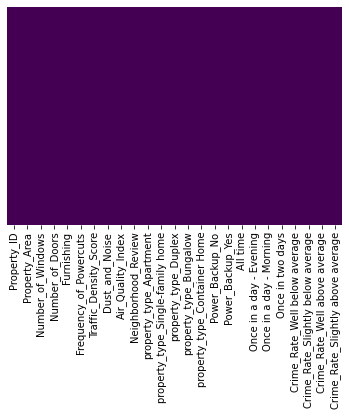

In [12]:
# sns.heatmap(df_input.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(test_input.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [13]:
# Furnishing 
# df_input['Furnishing'].unique()

ftrain= pd.get_dummies(df_input['Furnishing'])
ftrain.drop('NOT MENTIONED',inplace=True,axis=1)
df_input = pd.concat([df_input,ftrain],axis=1)
df_input.drop('Furnishing',axis=1,inplace=True)
# # df_input.info()

# #Test processing

ftest= pd.get_dummies(test_input['Furnishing'])
ftest.drop('NOT MENTIONED',inplace=True,axis=1)
test_input = pd.concat([test_input,ftest],axis=1)
test_input.drop('Furnishing',axis=1,inplace=True)
# test_input = test_input[~test_input['Furnishing'].isin(['NA'])]
# test_input = test_input[~test_input['Furnishing'].isna()]
# test_input[['Semi_Furnished','Unfurnished','Fully Furnished']] = pd.get_dummies(test_input['Furnishing'])
# test_input.drop('Furnishing',axis=1,inplace=True)

In [14]:
# Dust_and_Noise 
df_input = df_input[~df_input['Dust_and_Noise'].isna()]
#df_input['Dust_and_Noise'].unique()
df_input[['Dust_Medium','Dust_High','Dust_Low']] = pd.get_dummies(df_input['Dust_and_Noise'])
df_input.drop('Dust_and_Noise',axis=1,inplace=True)

# test 
test_input[['Dust_Medium','Dust_High','Dust_Low']] = pd.get_dummies(test_input['Dust_and_Noise'])
test_input.drop('Dust_and_Noise',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df_input_cleaned = df_input.copy(deep=True)
df_input_cleaned.drop('Property_ID',axis=1,inplace=True)
df_input_cleaned.head()

#TEST
test_cleaned = test_input.copy(deep=True)
# test_cleaned.drop('Property_ID',axis=1,inplace=True)
# test_cleaned.head()

Model Building Best Fit

In [20]:
from copy import deepcopy


def trainingbestfit(X_train,X_test,y_train,y_test):

    ######### 1. Random Forest  ############
    rf = RandomForestRegressor(n_estimators=1000)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    # Error 
    # R2 score 
    rf_r2score = r2_score(y_test,rf_pred)
    print("RF R2 " ,rf_r2score)
    # # MAE 
    rf_mae = MAE(y_test,rf_pred)
    print("RF MAE ",rf_mae)
    # # output 
    # output_rf = pd.DataFrame(list(zip(rf_pred,y_test)),columns={'RF Pred','Actual'})

    ######## 2. XGBoost ######################
    xg = XGBRegressor(n_estimators=1000,colsample_bytree= 0.7, learning_rate= 0.01, max_depth= 10)
    xg.fit(X_train,y_train)
    XG_pred = xg.predict(X_test)
    xg_r2score = r2_score(y_test,XG_pred)
    print("XG R2 ",xg_r2score)
    # # MAE 
    xg_mae = MAE(y_test,XG_pred)
    print("XG MAE ", xg_mae)
    # output_xg = pd.DataFrame(list(zip(XG_pred,y_test)),columns={'XG Pred','Actual'})
    #  print(output_xg)
    
    # return output_rf, output_xg

Training the models


In [21]:
df_input_cleaned.head()
X_train, X_test, y_train, y_test = train_test_split(df_input_cleaned.drop('Habitability_score',axis=1),df_input_cleaned['Habitability_score'],test_size=0.30)

Normalization 

In [ ]:
# X_train = (X_train-X_train.min())/(X_train.max()-X_train.min())
# X_test = (X_test-X_test.min())/(X_test.max()-X_test.min())
y_train
y_test

14885   36.080000
11081   64.210000
5798    34.220000
23900   72.070000
37695   92.500000
           ...   
30412   75.270000
19740   74.950000
19861   38.060000
2677    73.940000
12129   68.970000
Name: Habitability_score, Length: 10273, dtype: float64

In [23]:
trainingbestfit(X_train,X_test,y_train,y_test)

RF R2  0.8240771673147713
RF MAE  4.559336054706511
[19:12:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG R2  0.8266620106557598
XG MAE  4.583036043257534


Prediction 

In [25]:
df_input_cleaned.head()
X_train = df_input_cleaned.drop('Habitability_score',axis=1)
y_train = df_input_cleaned[['Habitability_score']]
X_test = test_cleaned.drop('Property_ID',axis=1)

In [ ]:
X_train

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,property_type_Apartment,property_type_Single-family home,property_type_Duplex,...,Crime_Rate_Well below average,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Slightly above average,Fully Furnished,Semi_Furnished,Unfurnished,Dust_Medium,Dust_High,Dust_Low
1,733,2.000000,2,1.000000,4.370000,96,3.550000,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,737,4.000000,2,0.000000,7.450000,121,3.810000,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,900,3.000000,2,2.000000,6.160000,100,1.340000,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,2238,14.000000,6,0.000000,5.460000,116,4.770000,0,1,0,...,0,0,0,1,1,0,0,0,0,1
5,1185,3.000000,3,0.000000,5.690000,91,4.490000,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39492,3317,10.000000,4,2.000000,4.050000,101,2.290000,0,1,0,...,1,0,0,0,1,0,0,0,0,1
39494,1120,3.000000,2,0.000000,5.550000,80,3.560000,0,0,0,...,1,0,0,0,0,0,0,0,0,1
39495,445,1.000000,3,1.000000,5.700000,86,2.930000,1,0,0,...,1,0,0,0,1,0,0,0,0,1
39496,3780,6.000000,6,0.000000,6.840000,137,3.800000,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [31]:
    rf = RandomForestRegressor(n_estimators=1000, max_depth= 10)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    # import xgboost as xg
    # xg = XGBRegressor(n_estimators=1000,colsample_bytree= 0.7, learning_rate= 0.01, max_depth= 10)
    # xg.fit(X_train,y_train)
    # XG_pred = xg.predict(X_test)
    # Error 
    # R2 score 
    # rf_r2score = r2_score(y_test,rf_pred)
    # print("RF R2 " ,rf_r2score)
    # # MAE 
    # rf_mae = MAE(y_test,rf_pred)
    # print("RF MAE ",rf_mae)
    # # output 
    # output_rf = pd.DataFrame(list(zip(rf_pred,y_test)),columns={'RF Pred','Actual'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
test_input['XGB Pred'] = XG_pred
test_input

,Property_ID,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,property_type_Apartment,property_type_Single-family home,...,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Slightly above average,Fully Furnished,Semi_Furnished,Unfurnished,Dust_Medium,Dust_High,Dust_Low,XGB Pred
0,0x6e93,293,3,1,0,7.280000,152,2.520000,1,0,...,0,1,0,0,0,1,0,0,1,27.351847
1,0x8787,586,4,1,0,7.630000,92,4.160000,1,0,...,0,0,1,0,1,0,0,0,1,78.338295
2,0x6c17,305,1,2,1,5.390000,90,2.920000,0,0,...,0,0,0,0,1,0,0,0,1,70.300766
3,0x9dbd,258,2,1,1,7.530000,158,3.450000,1,0,...,1,0,0,0,1,0,0,0,1,70.468491
4,0xbfde,3031,12,4,0,8.790000,186,2.720000,0,1,...,0,1,0,1,0,0,1,0,0,77.149063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0x423d,961,1,3,0,5.440000,94,3.550000,1,0,...,1,0,0,0,0,1,0,0,1,59.954159
10496,0x78c5,282,1,2,3,6.720000,106,2.900000,0,0,...,0,0,1,0,1,0,0,0,1,84.492287
10497,0xbf3,27445,5,2,0,9.280000,149,4.020000,0,0,...,0,0,1,1,0,0,1,0,0,73.531731
10498,0x305b,1451,2,3,1,6.250000,131,3.490000,0,0,...,0,0,1,0,0,1,0,0,1,80.678719


In [32]:
#test_input.to_excel(r'C:\Users\md.bahauddin\OneDrive - o9 Solutions\DS Compi Hacker Earth\outputs\Output4.xlsx')
dict = {'Property_ID': test_input['Property_ID'],'Habitability_score': rf_pred} 
     
de = pd.DataFrame(dict)
de.to_csv('submission2.csv',index=False)

In [28]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.1, 0.3],
           'n_estimators': [100, 500, 1000]}
rf =RandomForestRegressor()
clf = GridSearchCV(estimator=rf, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


ValueError: ignored

hypertune

In [17]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.1, 0.3],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

# Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 1000}
# Lowest RMSE:  5.928557168666249

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[18:06:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:24] WARNING: /workspace/src/objective/regr